In [241]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

I.  A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [354]:
comp_data = pd.read_csv("Company_Data.csv")

In [355]:
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [356]:
comp_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [357]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


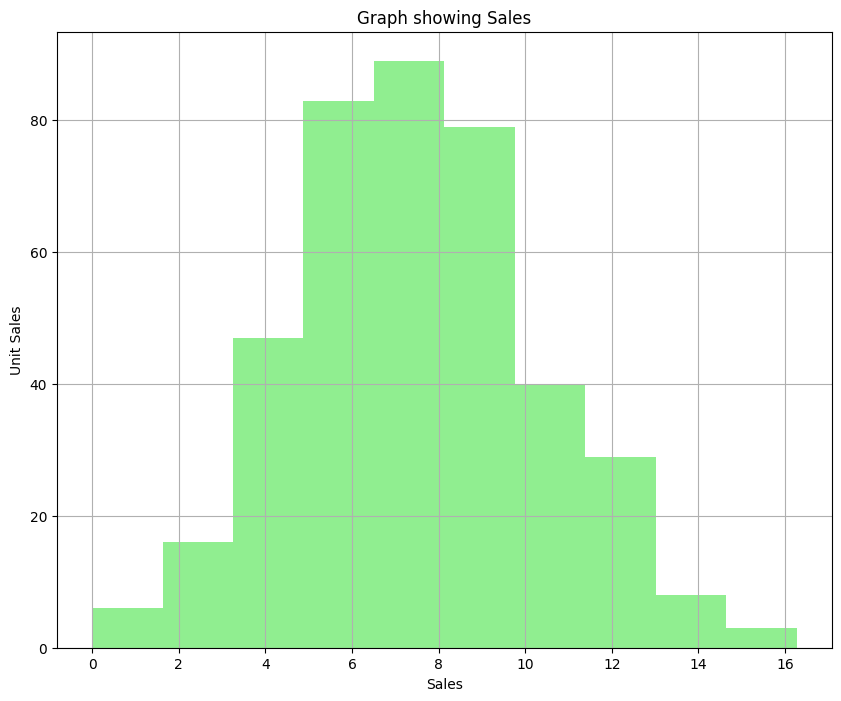

In [358]:
plt.figure(figsize=(10,8))
plt.hist(comp_data['Sales'], bins=10,color='lightgreen')
plt.title('Graph showing Sales')
plt.xlabel('Sales')
plt.ylabel('Unit Sales')
plt.grid(True)
plt.show()

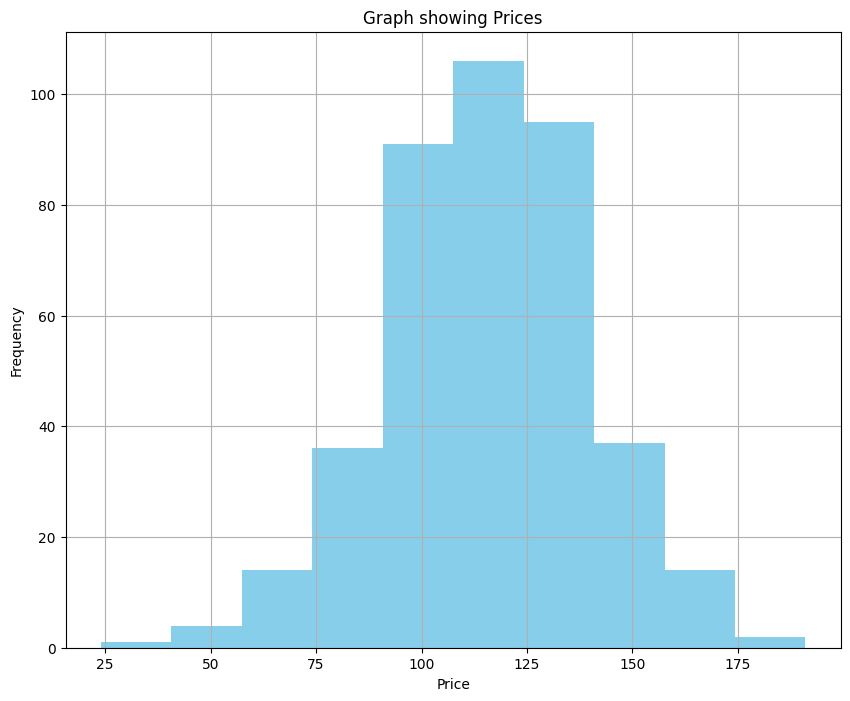

In [359]:
plt.figure(figsize=(10,8))
plt.hist(comp_data['Price'], bins=10,color='skyblue')
plt.title('Graph showing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

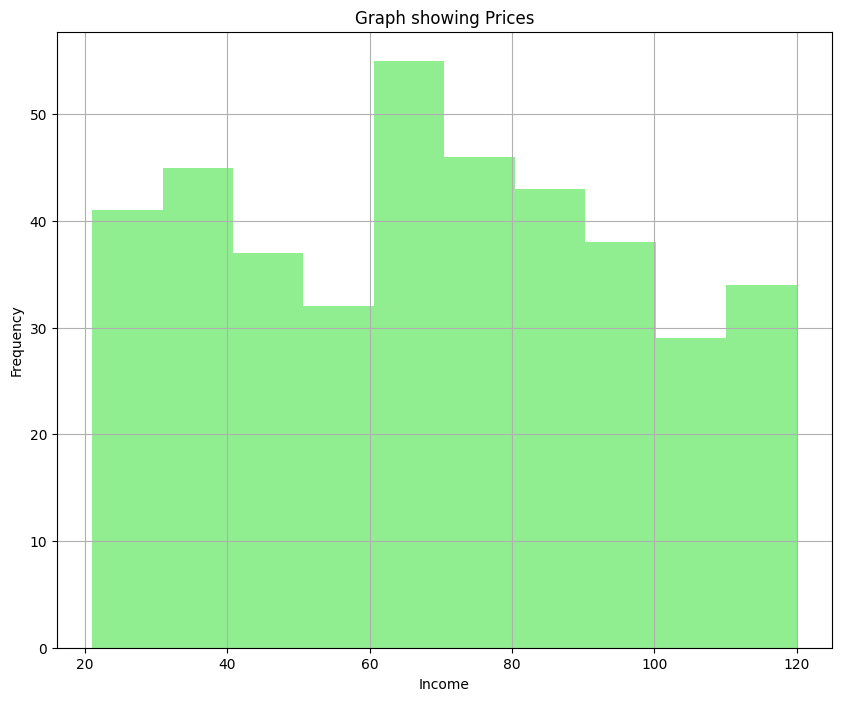

In [360]:
plt.figure(figsize=(10,8))
plt.hist(comp_data['Income'], bins=10,color='lightgreen')
plt.title('Graph showing Prices')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [361]:
comp_data.shape
comp_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


Conversion of Urban, US, Shelveloc and Sales column into categorical

In [362]:
comp_data['Urban'] = comp_data['Urban'].astype('category')
comp_data['Urban'] = comp_data['Urban'].map({'Yes': 1,'No': 0})

In [363]:
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,Yes
1,11.22,111,48,16,260,83,Good,65,10,1,Yes
2,10.06,113,35,10,269,80,Medium,59,12,1,Yes
3,7.40,117,100,4,466,97,Medium,55,14,1,Yes
4,4.15,141,64,3,340,128,Bad,38,13,1,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,Yes
396,6.14,139,23,3,37,120,Medium,55,11,0,Yes
397,7.41,162,26,12,368,159,Medium,40,18,1,Yes
398,5.94,100,79,7,284,95,Bad,50,12,1,Yes


In [364]:
comp_data['US'] = comp_data['US'].astype('category')
comp_data['US'] = comp_data['US'].map({'Yes': 1,'No': 0})

In [365]:
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [366]:
comp_data['ShelveLoc'] = comp_data['ShelveLoc'].astype('category')
comp_data['ShelveLoc'] = comp_data['ShelveLoc'].map({'Bad': -1,'Medium': 0,'Good': 1})

In [255]:
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,-1,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,0,59,12,1,1
3,7.40,117,100,4,466,97,0,55,14,1,1
4,4.15,141,64,3,340,128,-1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,0,55,11,0,1
397,7.41,162,26,12,368,159,0,40,18,1,1
398,5.94,100,79,7,284,95,-1,50,12,1,1


In [256]:
#Categorising Sales
bins = [-np.inf, 5, 10, np.inf]  
labels = [1, 2, 3] 

comp_data['Sales'] = pd.cut(comp_data['Sales'], bins=bins, labels=labels)


In [257]:
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,-1,42,17,1,1
1,3,111,48,16,260,83,1,65,10,1,1
2,3,113,35,10,269,80,0,59,12,1,1
3,2,117,100,4,466,97,0,55,14,1,1
4,1,141,64,3,340,128,-1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,3,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,0,55,11,0,1
397,2,162,26,12,368,159,0,40,18,1,1
398,2,100,79,7,284,95,-1,50,12,1,1


In [258]:
comp_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [259]:
x = comp_data.values[:,1:]
y = comp_data.values[:,0]

In [260]:
x.shape

(400, 10)

In [261]:
y.shape

(400,)

In [262]:
x

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [263]:
y

array([2, 3, 3, 2, 1, 3, 2, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 2, 3, 1,
       1, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 3,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2,
       2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2,
       2, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 1, 2, 3,
       3, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 1, 3, 2, 2,

In [264]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

scaler.fit(x)
x=scaler.transform(x)

In [265]:
print(x)

[[ 0.85045499  0.15536099  0.65717702 ...  1.18444912  0.64686916
   0.74188112]
 [-0.91248434 -0.73906037  1.40995711 ... -1.4901134   0.64686916
   0.74188112]
 [-0.78189624 -1.20415947  0.506621   ... -0.72595268  0.64686916
   0.74188112]
 ...
 [ 2.41751217 -1.52615116  0.80773304 ...  1.56652948  0.64686916
   0.74188112]
 [-1.63071888  0.37002211  0.05495295 ... -0.72595268  0.64686916
   0.74188112]
 [ 0.58927879 -1.13260576 -0.99893918 ...  0.80236876  0.64686916
   0.74188112]]


In [266]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [267]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 10)
(320,)
(80, 10)
(80,)


In [268]:
#Prediction of whether the store is in  urban or not
 
from sklearn.tree import DecisionTreeClassifier 

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

model_DecisionTree.fit(x_train,y_train)
y_pred=model_DecisionTree.predict(x_test)

In [269]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cfm=confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model:  ", acc)

[[ 5  8  0]
 [ 6 38  5]
 [ 0  9  9]]
Classification report: 
              precision    recall  f1-score   support

           1       0.45      0.38      0.42        13
           2       0.69      0.78      0.73        49
           3       0.64      0.50      0.56        18

    accuracy                           0.65        80
   macro avg       0.60      0.55      0.57        80
weighted avg       0.64      0.65      0.64        80

Accuracy of the model:   0.65


In [414]:
from sklearn.tree import plot_tree

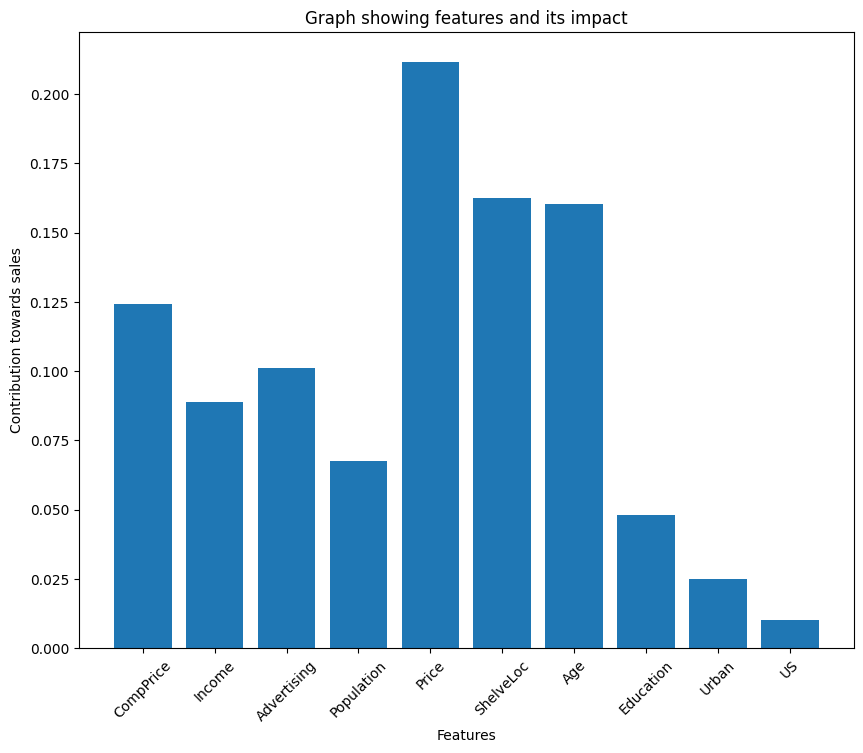

In [227]:
feature_imp = model_DecisionTree.feature_importances_ 
plt.figure(figsize= (10,8))
plt.bar(comp_data.columns[1:], feature_imp)
plt.xlabel('Features')
plt.ylabel('Contribution towards sales')
plt.title('Graph showing features and its impact')
plt.xticks(rotation=45)
plt.show()

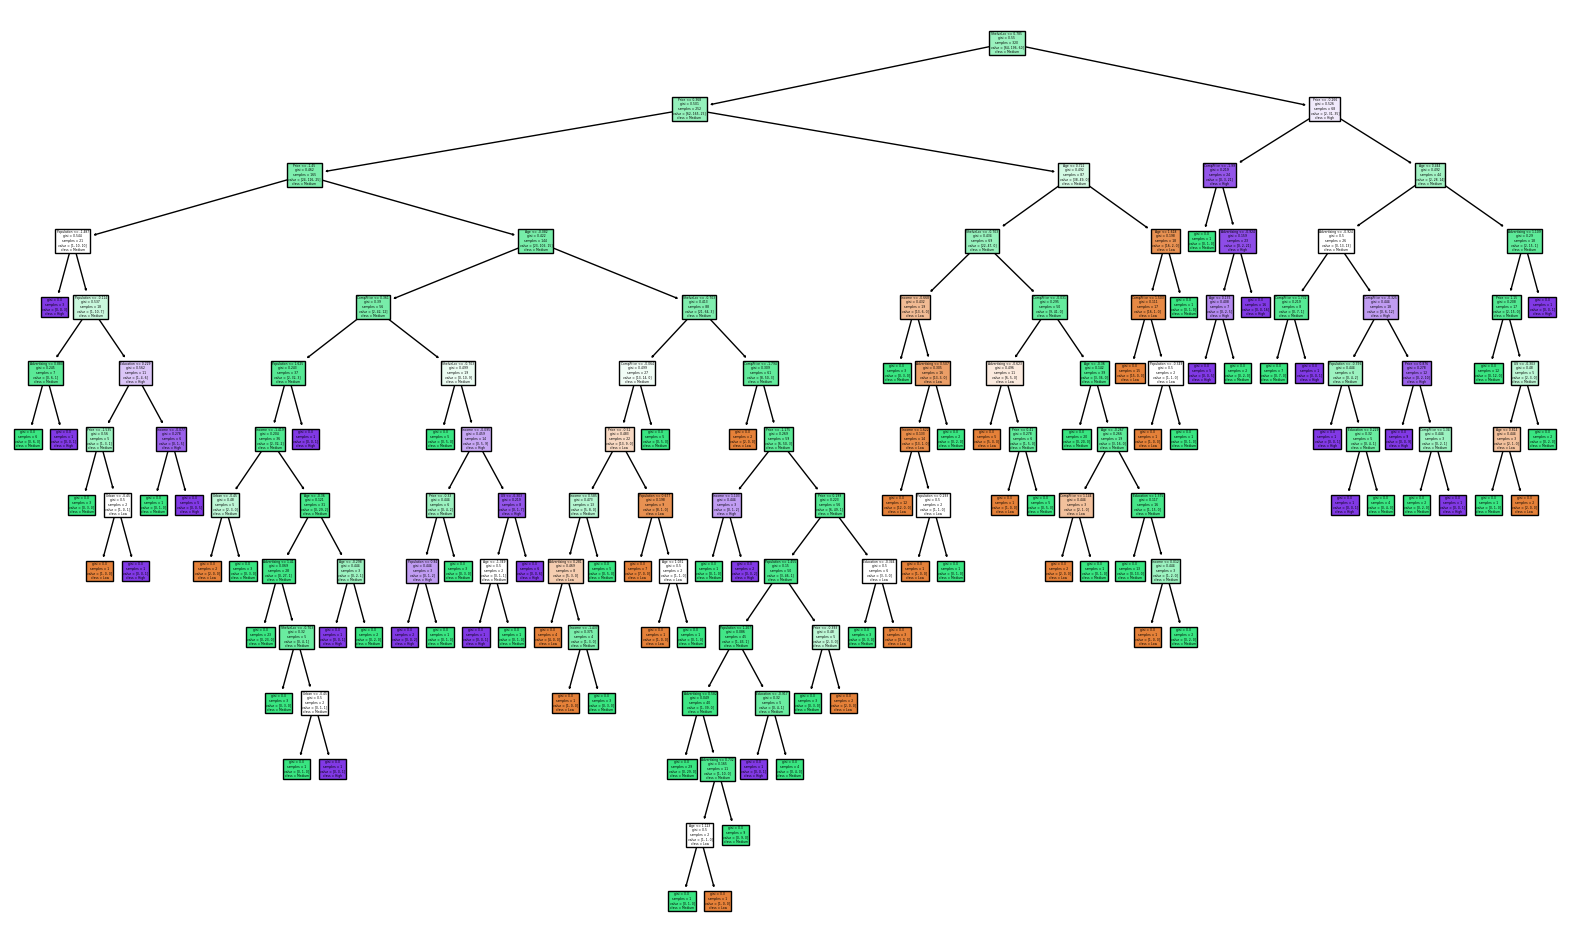

In [223]:
features = comp_data.iloc[:,1:]
target = comp_data.iloc[:,0]

plt.figure(figsize=(20,12))
plot_tree(model_DecisionTree,filled=True,feature_names=features.columns, class_names=['Low', 'Medium', 'High'])
plt.show()

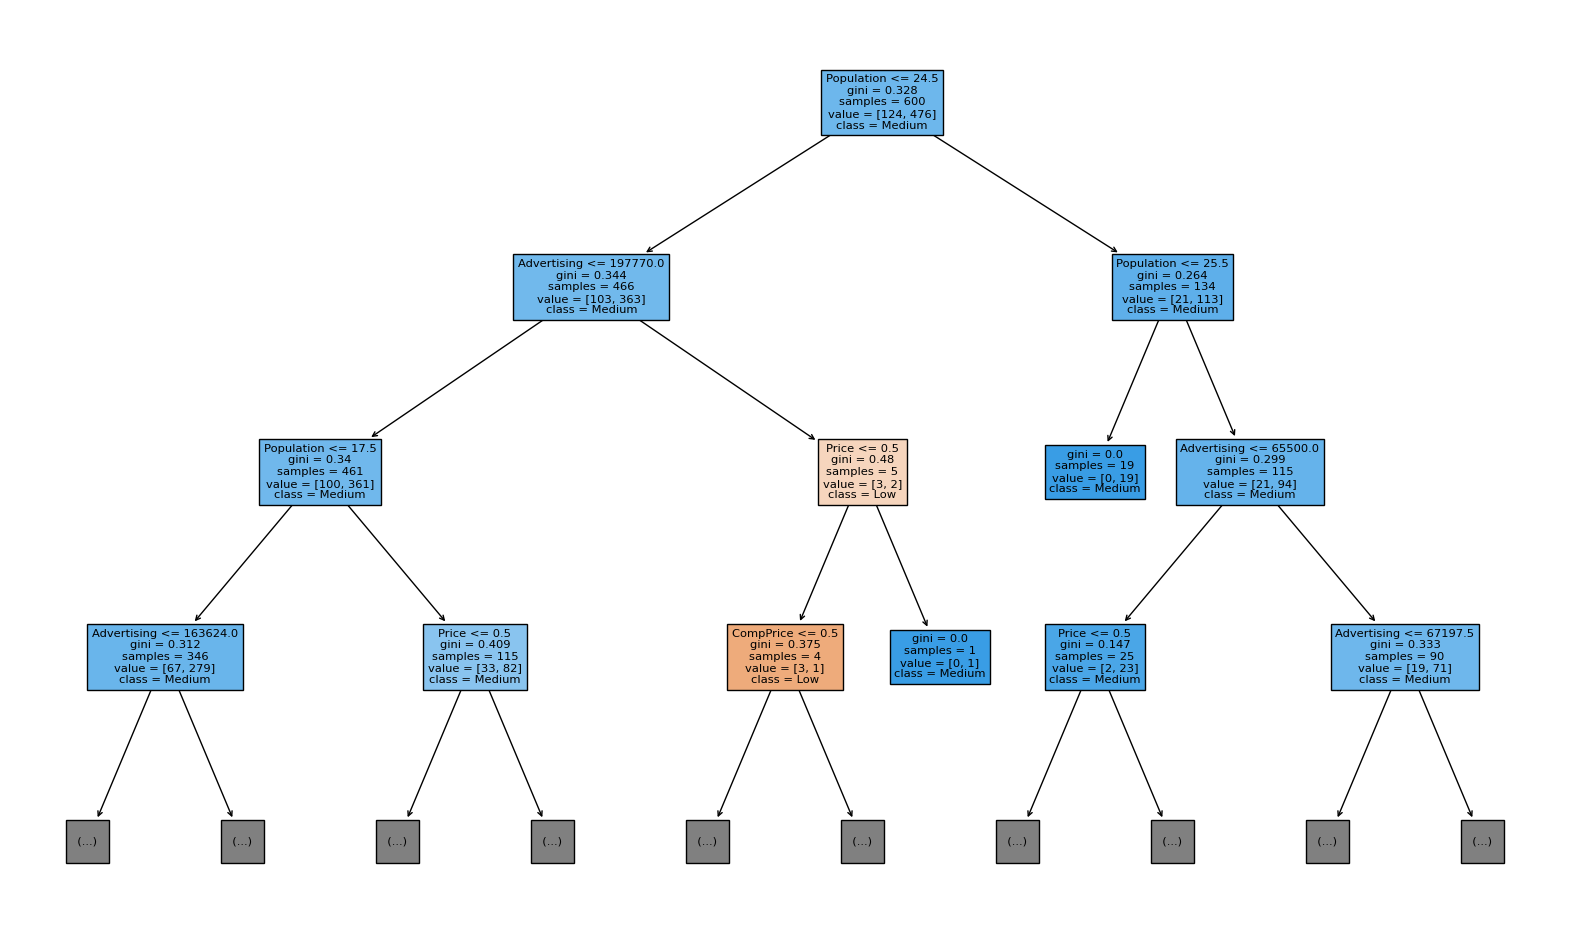

In [483]:
features = comp_data.iloc[:,1:]
target = comp_data.iloc[:,0]

plt.figure(figsize=(20,12))
plot_tree(model_DecisionTree,filled=True,feature_names=features.columns, class_names=['Low', 'Medium', 'High'], max_depth=3)
plt.show()

### II. Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [456]:
fr_data = pd.read_csv("Fraud_check.csv")
fr_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [457]:
fr_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


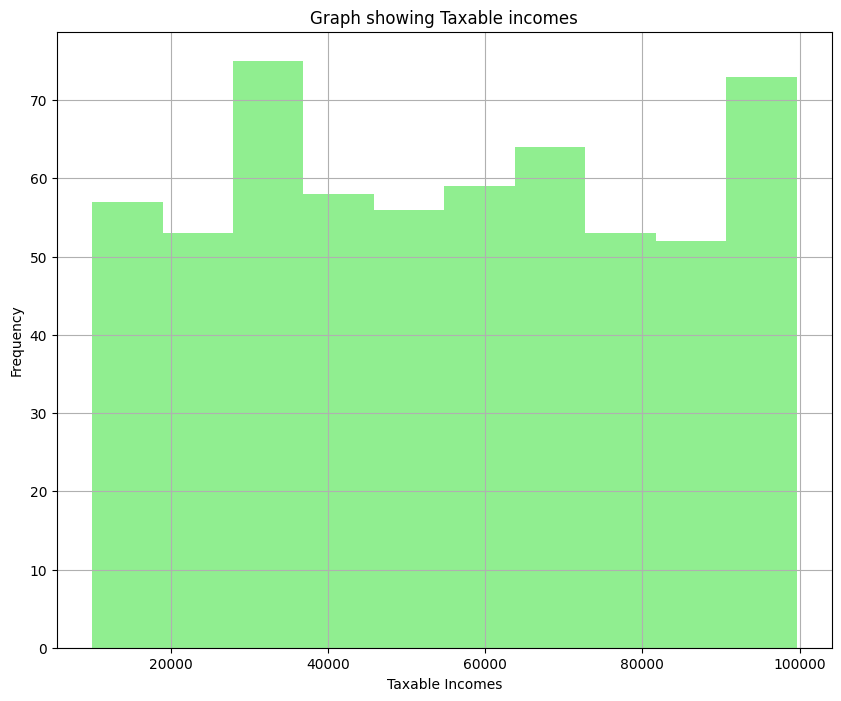

In [458]:
plt.figure(figsize=(10,8))
plt.hist(fr_data['Taxable.Income'], bins=10,color='lightgreen')
plt.title('Graph showing Taxable incomes')
plt.xlabel('Taxable Incomes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

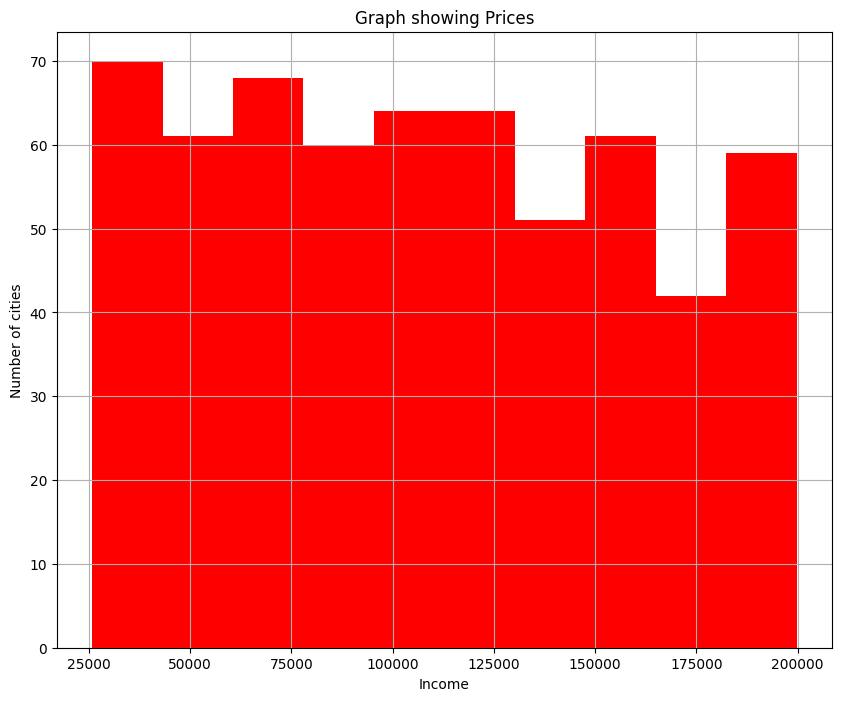

In [459]:
plt.figure(figsize=(10,8))
plt.hist(fr_data['City.Population'], bins=10,color='red')
plt.title('Graph showing Prices')
plt.xlabel('Income')
plt.ylabel('Number of cities')
plt.grid(True)
plt.show()

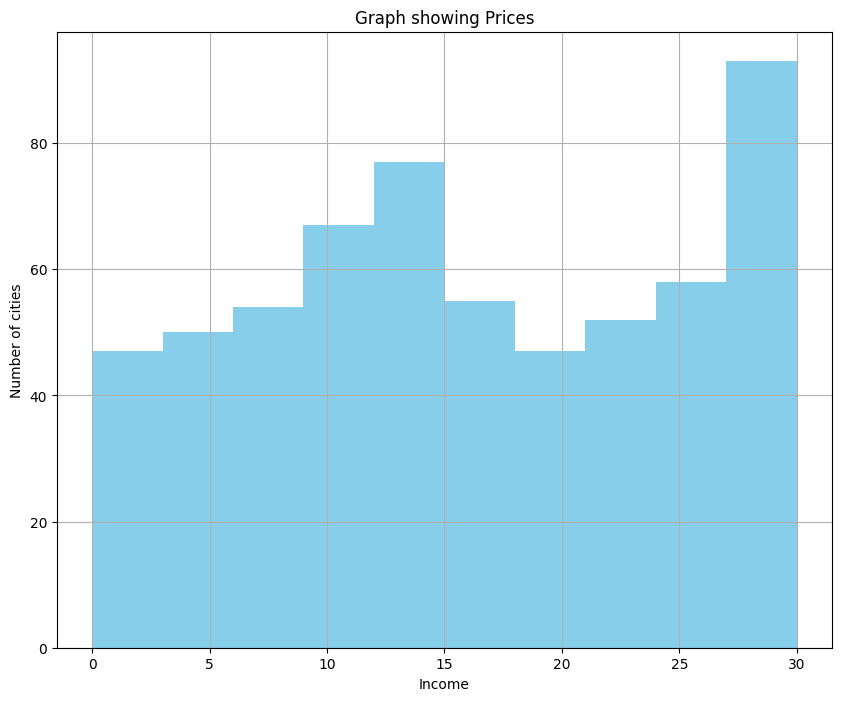

In [460]:
plt.figure(figsize=(10,8))
plt.hist(fr_data['Work.Experience'], bins=10,color='skyblue')
plt.title('Graph showing Prices')
plt.xlabel('Income')
plt.ylabel('Number of cities')
plt.grid(True)
plt.show()

In [461]:
fr_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [462]:
fr_data.shape

(600, 6)

In [463]:
fr_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [464]:
fr_data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [465]:
fr_data['Undergrad'] = fr_data['Undergrad'].astype('category')
fr_data['Undergrad'] = fr_data['Undergrad'].map({'YES': 1,'NO': 0})

In [466]:
fr_data['Marital.Status'] = fr_data['Marital.Status'].astype('category')
fr_data['Marital.Status'] = fr_data['Marital.Status'].map({'Single': 0,'Divorced': -1, 'Married': 1})

In [467]:
fr_data['Urban'] = fr_data['Urban'].astype('category')
fr_data['Urban'] = fr_data['Urban'].map({'NO': 0, 'YES': 1})

In [468]:
bins = [-np.inf, 30000, np.inf] 
labels = [-1, 1]
fr_data['Taxable.Income']=pd.cut(fr_data['Taxable.Income'], bins=bins,labels=labels)
fr_data['Taxable.Income']=fr_data['Taxable.Income'].astype('int')

In [469]:
fr_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,-1,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,-1,1,39492,7,1
596,1,-1,1,55369,2,1
597,0,-1,1,154058,0,1
598,1,1,1,180083,17,0


In [470]:
x = fr_data.drop(columns=['Taxable.Income'])
y = fr_data['Taxable.Income']


In [471]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,-1,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,-1,39492,7,1
596,1,-1,55369,2,1
597,0,-1,154058,0,1
598,1,1,180083,17,0


In [472]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

In [473]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [474]:
print(x)

[[-1.040833   -0.01043082 -1.17852072 -0.62914254  0.99335541]
 [ 0.96076892 -1.2621297   0.50850002  0.27636996  0.99335541]
 [-1.040833    1.24126805  1.03310911  1.63463872  0.99335541]
 ...
 [-1.040833   -1.2621297   0.90969648 -1.76103318  0.99335541]
 [ 0.96076892  1.24126805  1.43219749  0.1631809  -1.00668904]
 [-1.040833   -1.2621297   0.9915901   0.04999184 -1.00668904]]


In [475]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [476]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 5)
(120, 5)
(480,)
(120,)


In [477]:
# AModel on fraud data
from sklearn.tree import DecisionTreeClassifier 
model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=42)
model_DecisionTree.fit(x_train,y_train)
y_pred=model_DecisionTree.predict(x_test)

In [478]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

cfm=confusion_matrix(y_test, y_pred)
print(cfm)

print("classification_report:  ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model:  ", acc)

[[ 4 22]
 [23 71]]
classification_report:  
              precision    recall  f1-score   support

          -1       0.15      0.15      0.15        26
           1       0.76      0.76      0.76        94

    accuracy                           0.62       120
   macro avg       0.46      0.45      0.46       120
weighted avg       0.63      0.62      0.63       120

Accuracy of the model:   0.625


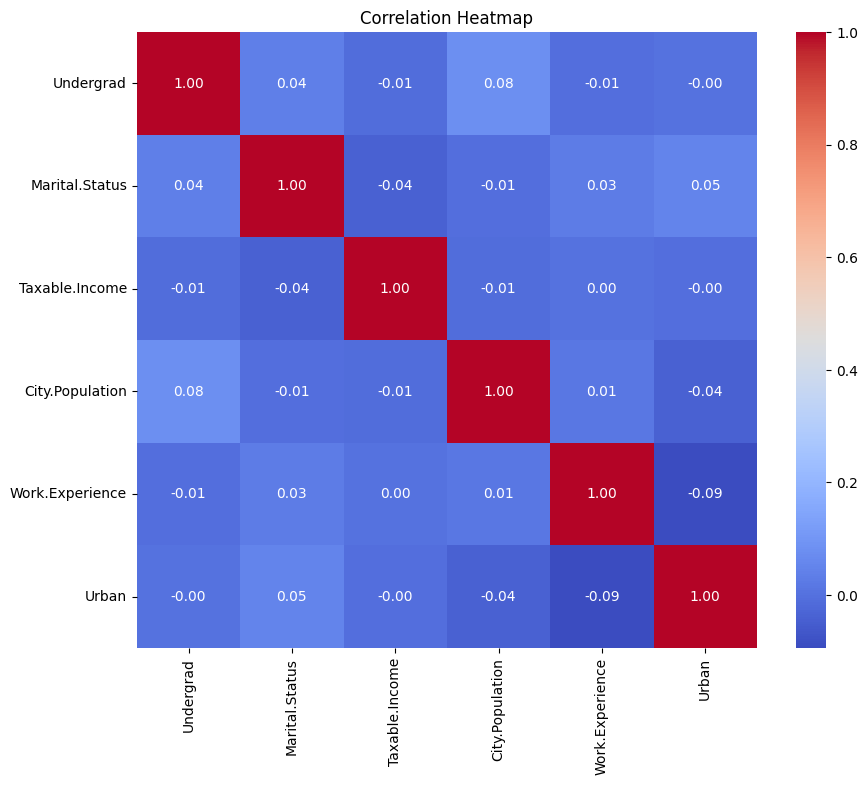

In [479]:
correlation_matrix = fr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Visualizing of fraud data with Decision Tree

In [484]:
features = fr_data.drop(columns=['Taxable.Income'])
target = fr_data['Taxable.Income']

In [485]:

model_DecisionTree = DecisionTreeClassifier(criterion="gini", max_depth=5)
model_DecisionTree.fit(features, target)



DecisionTreeClassifier(max_depth=5)

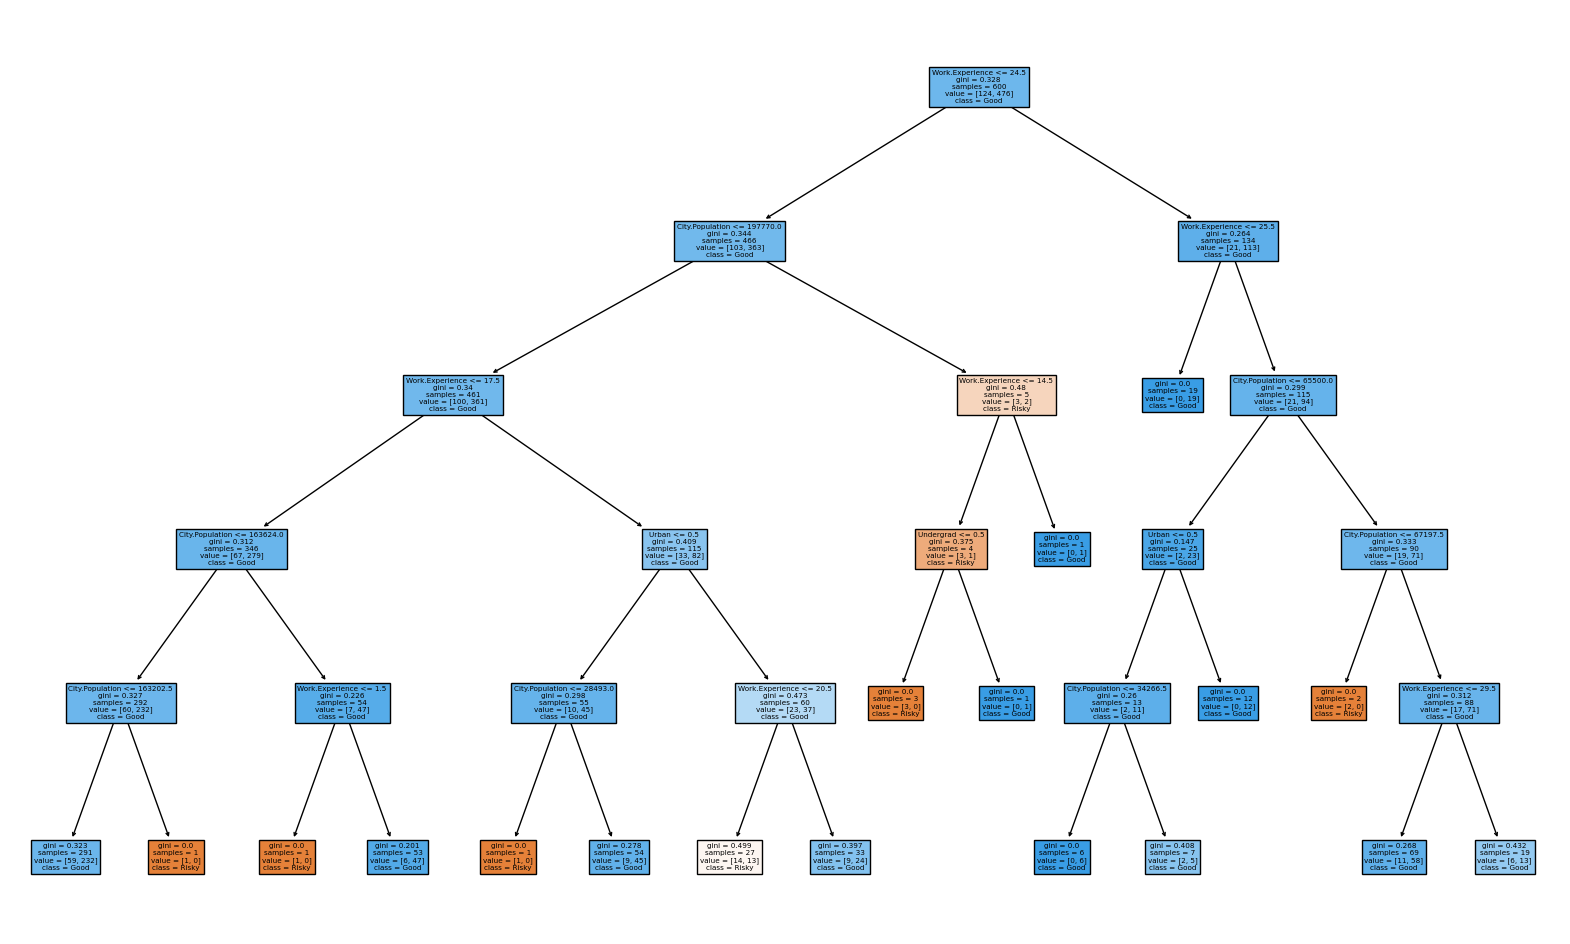

In [486]:
plt.figure(figsize=(20, 12))
plot_tree(model_DecisionTree, filled=True, feature_names=features.columns, class_names=['Risky', 'Good'])
plt.show()